<a href="https://www.kaggle.com/code/mosesmoncy/cern-electron-collision-prediction?scriptVersionId=126873410" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.

The Large Hadron Collider (LHC) is the world’s largest and most powerful particle accelerator. It consists of a 27-kilometre ring of superconducting magnets with a number of accelerating structures to boost the energy of the particles along the way.
When an electron collides with an atom or ion, there is a small probability that the electron kicks out another electron, leaving the ion in the next highest charge state (charge q increased by +1). This is called electron-impact ionization and is the dominant process by which atoms and ions become more highly charged.

Here the model is created to predict the estimate invariant mass of two electrons (GeV==> Giga Electron Volt) labelled as 'M' using regression models.

# Run: The run number of the event.
# Event: The event number.
# E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
# px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).
# pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
# eta1, eta2: The pseudorapidity of the electron 1 and 2.
# phi1, phi2: The phi angle of the electron 1 and 2 (rad).
# Q1, Q2: The charge of the electron 1 and 2.
# M: The invariant mass of two electrons (GeV).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/electron-mass-dataset/dielectron.csv')
a

Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2         M  
0       2.14537 -2.344030 -2.072810  -1   8.94841  
1      12.75360  0.808077  2.734920   1  15.89300  
2       2.69667 -2.455080  2.148570   1  38.38770  
3       4.84272  2.330210  0.565865  -1   3.72862  
4       2.44145 -2.423700 -1.684810  -1   2.74718  
...         ...       ...       ...  ..       ...  
99995   1.71967  0.307851 -1.171470   1   8.44779  
99996   2.68598 -2.383880 -2.126960   1  20.71540  
99997  14.45010 -2.300410 -2.444050  -1  12.71350  
99998   3.10141  1.677170  1.448610   1   4.69670  
99999  17.42700  1.759250 -0.267427  -1  36.50430  

[100000 rows x 19 columns]

In [3]:
# read first five data

a.head()

Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

In [4]:
# read last five data

a.tail()

Run      Event        E1       px1         py1       pz1       pt1  \
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2         M  
99995   1.71967  0.307851 -1.171470   1   8.44779  
99996   2.68598 -2.383880 -2.126960   1  20.71540  
99997  14.45010 -2.300410 -2.444050  -1  12.71350  
99998   3.10141  1.677170  1.448610   1   4.69670  
99999  17.42700  1.759250 -0.267427  -1  36.50430

In [5]:
a.shape

(100000, 19)

In [6]:
a.describe

<bound method NDFrame.describe of           Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

     

In [7]:
a.dtypes

Run        int64
Event      int64
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1         int64
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2         int64
M        float64
dtype: object

In [8]:
a.isna().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

In [9]:
a['M'].value_counts()

14.7686    5
21.5071    4
25.7524    4
22.2621    4
16.4346    4
          ..
57.0725    1
44.8470    1
55.0832    1
86.8301    1
36.5043    1
Name: M, Length: 93244, dtype: int64

In [10]:
# filling missing values of 'Mass (M)' with mean()

a['M']=a['M'].fillna(a['M'].mean())

In [11]:
a.isna().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

Visualisation

In [12]:
a.head()

Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

In [13]:
a.columns

Index(['Run', 'Event', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'],
      dtype='object')

<AxesSubplot:xlabel='Q2', ylabel='Count'>

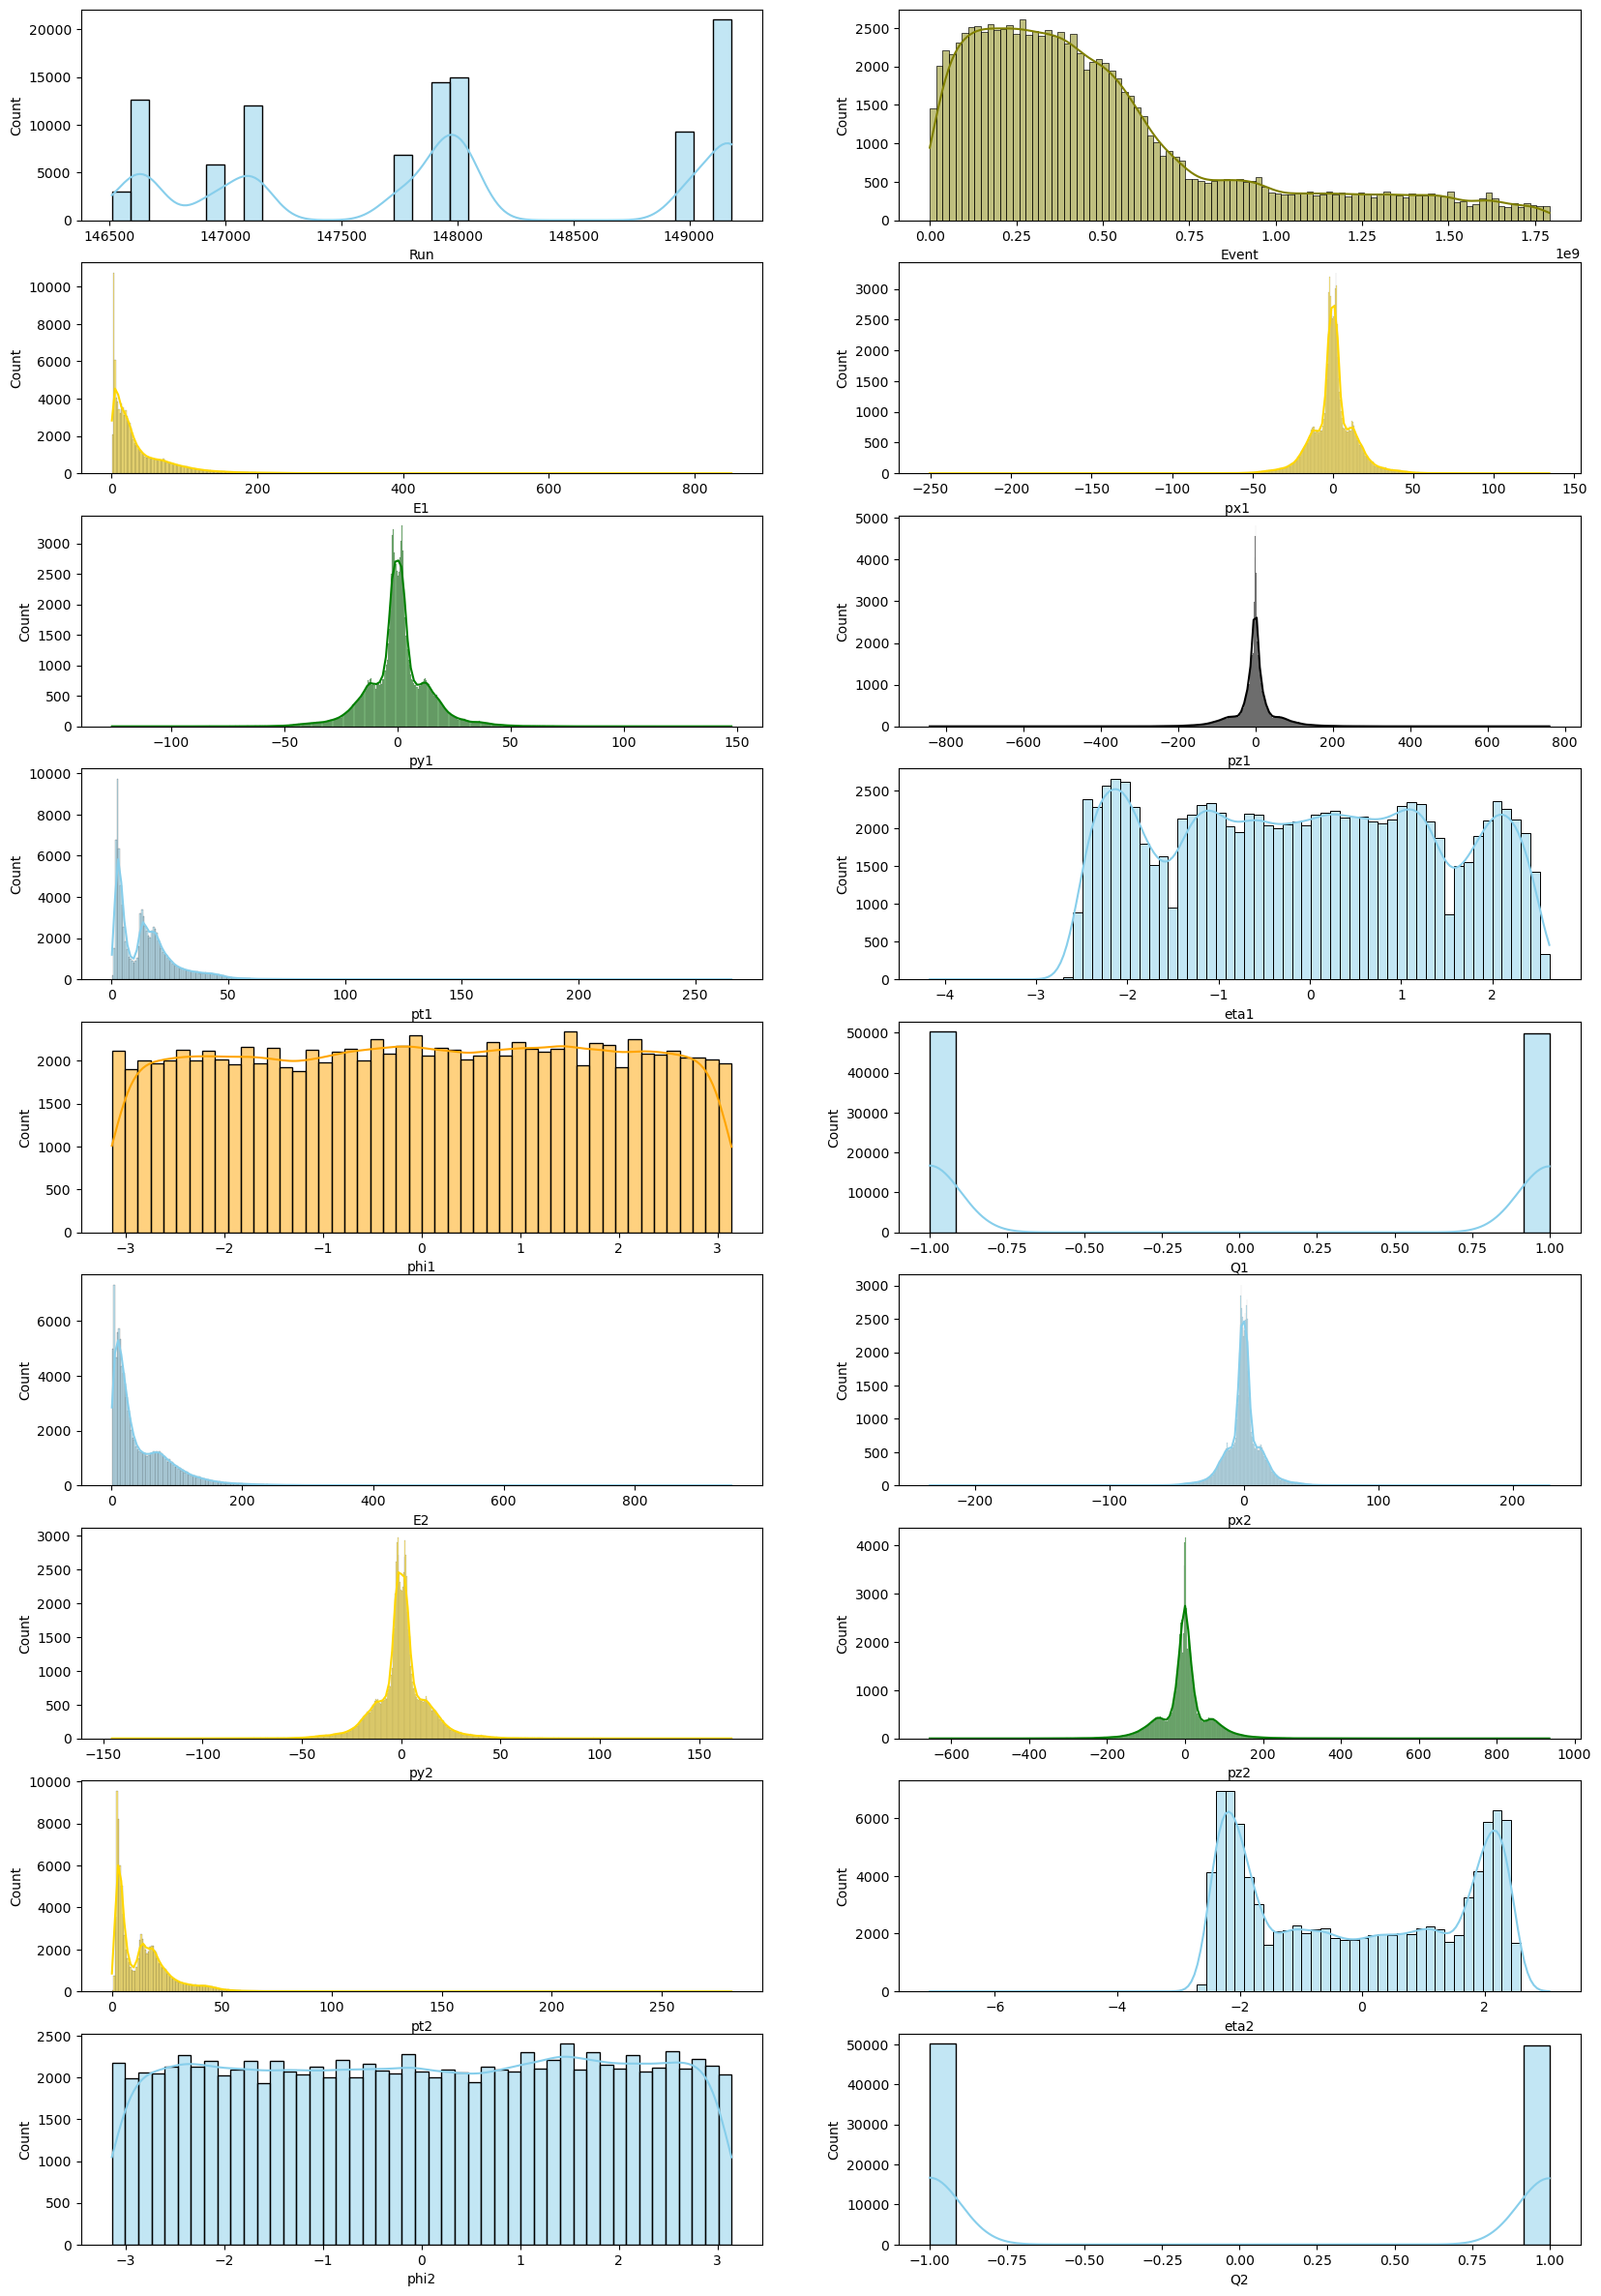

In [14]:
fig, axs = plt.subplots(9, 2, figsize=(20,30))
sns.histplot(data=a['Run'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['Event'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['E1'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['px1 '], kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=a['py1'], kde=True, color="green", ax=axs[2, 0])
sns.histplot(data=a['pz1'], kde=True, color="black", ax=axs[2, 1])
sns.histplot(data=a['pt1'], kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=a['eta1'], kde=True, color="skyblue", ax=axs[3, 1])
sns.histplot(data=a['phi1'], kde=True, color="orange", ax=axs[4, 0])
sns.histplot(data=a['Q1'], kde=True, color="skyblue", ax=axs[4, 1])
sns.histplot(data=a['E2'], kde=True, color="skyblue", ax=axs[5, 0])
sns.histplot(data=a['px2'], kde=True, color="skyblue", ax=axs[5, 1])
sns.histplot(data=a['py2'], kde=True, color="gold", ax=axs[6, 0])
sns.histplot(data=a['pz2'], kde=True, color="green", ax=axs[6, 1])
sns.histplot(data=a['pt2'], kde=True, color="gold", ax=axs[7, 0])
sns.histplot(data=a['eta2'], kde=True, color="skyblue", ax=axs[7, 1])
sns.histplot(data=a['phi2'], kde=True, color="skyblue", ax=axs[8, 0])
sns.histplot(data=a['Q2'], kde=True, color="skyblue", ax=axs[8, 1])




In [15]:
a.corr()

Run     Event        E1      px1        py1       pz1       pt1  \
Run    1.000000  0.177591  0.093160 -0.000805  0.002612 -0.008263  0.154394   
Event  0.177591  1.000000  0.040582 -0.001221  0.001085 -0.003456  0.059086   
E1     0.093160  0.040582  1.000000  0.006000  0.033998 -0.042896  0.716405   
px1   -0.000805 -0.001221  0.006000  1.000000 -0.008246 -0.012964 -0.004785   
py1    0.002612  0.001085  0.033998 -0.008246  1.000000 -0.010190  0.014005   
pz1   -0.008263 -0.003456 -0.042896 -0.012964 -0.010190  1.000000 -0.010538   
pt1    0.154394  0.059086  0.716405 -0.004785  0.014005 -0.010538  1.000000   
eta1  -0.005313 -0.005444 -0.020540 -0.010422 -0.011570  0.771540  0.012602   
phi1  -0.001447 -0.000474  0.020598 -0.007364  0.593994 -0.011113  0.005075   
Q1     0.002163 -0.005656  0.018693 -0.005349 -0.002777 -0.002696  0.018449   
E2     0.099260  0.042177 -0.153928 -0.004689  0.001990  0.001790 -0.170137   
px2    0.002809 -0.000759 -0.010165 -0.326203  0.002932  0.002600 -0.008233   
py2   -0.004938 -0.004475 -0.020166  0.001338 -0.333377 -0.001779 -0.020131   
pz2    0.002738  0.002236 -0.000463 -0.004637  0.000201  0.205669  0.012364   
pt2    0.151615  0.058890 -0.139307 -0.003673  0.002553  0.005678 -0.031569   
eta2   0.005224  0.003076 -0.008389 -0.003684 -0.001624  0.229279  0.004559   
phi2   0.000432 -0.003610 -0.007031  0.002400 -0.221696  0.003791 -0.006604   
Q2     0.002110  0.003686 -0.001123  0.005808  0.003516  0.000509 -0.003217   
M      0.129399  0.052342  0.285173  0.006112  0.007537  0.011526  0.437041   

           eta1      phi1        Q1        E2       px2       py2       pz2  \
Run   -0.005313 -0.001447  0.002163  0.099260  0.002809 -0.004938  0.002738   
Event -0.005444 -0.000474 -0.005656  0.042177 -0.000759 -0.004475  0.002236   
E1    -0.020540  0.020598  0.018693 -0.153928 -0.010165 -0.020166 -0.000463   
px1   -0.010422 -0.007364 -0.005349 -0.004689 -0.326203  0.001338 -0.004637   
py1   -0.011570  0.593994 -0.002777  0.001990  0.002932 -0.333377  0.000201   
pz1    0.771540 -0.011113 -0.002696  0.001790  0.002600 -0.001779  0.205669   
pt1    0.012602  0.005075  0.018449 -0.170137 -0.008233 -0.020131  0.012364   
eta1   1.000000 -0.013193 -0.001729 -0.008917 -0.000823 -0.004075  0.223965   
phi1  -0.013193  1.000000  0.000666  0.001574  0.003230 -0.217198  0.000037   
Q1    -0.001729  0.000666  1.000000 -0.011930 -0.003489  0.003405 -0.005289   
E2    -0.008917  0.001574 -0.011930  1.000000  0.006727  0.001444 -0.020004   
px2   -0.000823  0.003230 -0.003489  0.006727  1.000000  0.003975  0.004140   
py2   -0.004075 -0.217198  0.003405  0.001444  0.003975  1.000000 -0.024807   
pz2    0.223965  0.000037 -0.005289 -0.020004  0.004140 -0.024807  1.000000   
pt2   -0.005242 -0.000796 -0.008557  0.760514 -0.003743 -0.002847  0.003294   
eta2   0.245753  0.000695 -0.004432 -0.007504 -0.002373 -0.021920  0.764605   
phi2   0.002155 -0.134250 -0.001543  0.008651 -0.004738  0.579359 -0.016677   
Q2     0.003021 -0.001711 -0.141087  0.009910 -0.007540 -0.001515  0.000210   
M      0.017100  0.001832  0.005622  0.324595 -0.004418 -0.011723  0.015702   

            pt2      eta2      phi2        Q2         M  
Run    0.151615  0.005224  0.000432  0.002110  0.129399  
Event  0.058890  0.003076 -0.003610  0.003686  0.052342  
E1    -0.139307 -0.008389 -0.007031 -0.001123  0.285173  
px1   -0.003673 -0.003684  0.002400  0.005808  0.006112  
py1    0.002553 -0.001624 -0.221696  0.003516  0.007537  
pz1    0.005678  0.229279  0.003791  0.000509  0.011526  
pt1   -0.031569  0.004559 -0.006604 -0.003217  0.437041  
eta1  -0.005242  0.245753  0.002155  0.003021  0.017100  
phi1  -0.000796  0.000695 -0.134250 -0.001711  0.001832  
Q1    -0.008557 -0.004432 -0.001543 -0.141087  0.005622  
E2     0.760514 -0.007504  0.008651  0.009910  0.324595  
px2   -0.003743 -0.002373 -0.004738 -0.007540 -0.004418  
py2   -0.002847 -0.021920  0.579359 -0.001515 -0.011723  
pz2    0.003294  0.764605 -0.016677  0

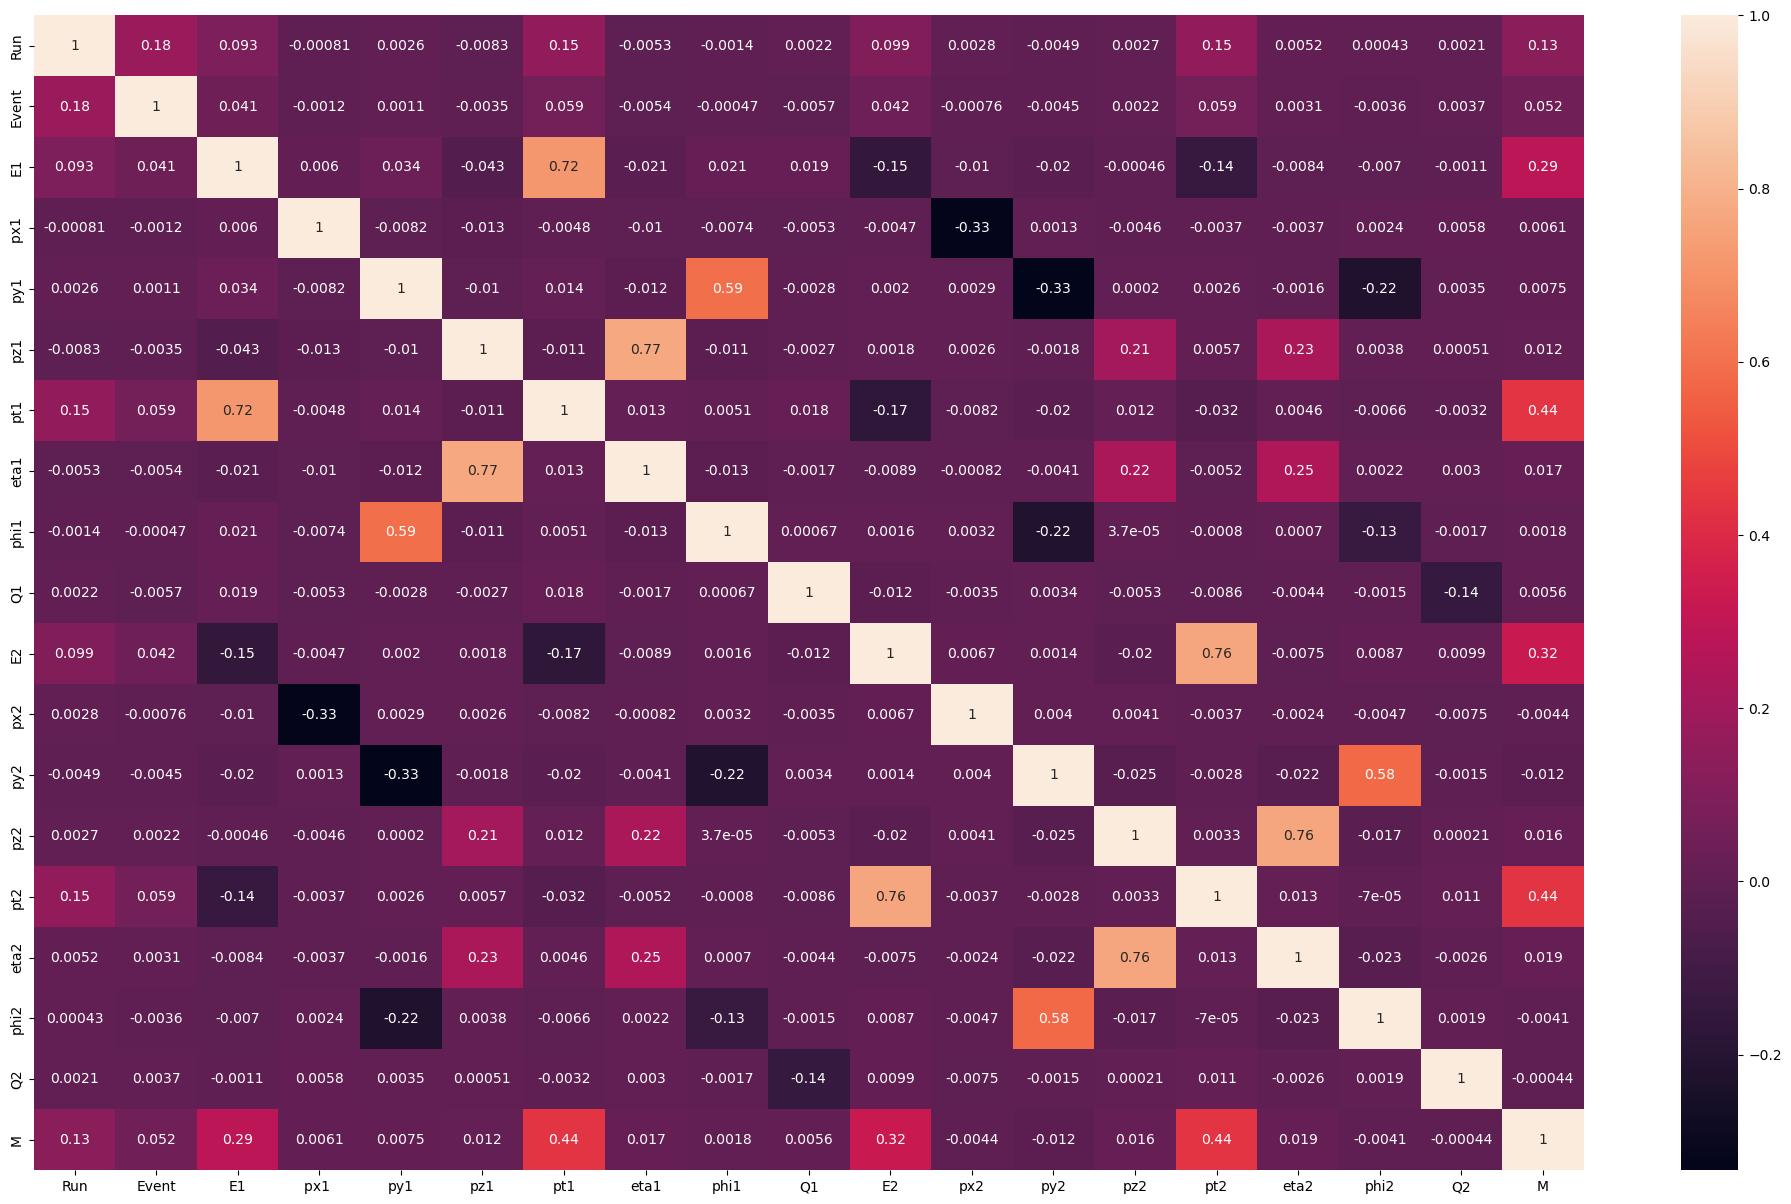

In [16]:
#Correlation matrix
sns.set_style()
plt.figure(figsize=(25,15))
sns.heatmap(a.corr(),annot=True)
plt.show()

In [17]:
# splitting x(inputs) and y(outputs)

x=a.drop(['M'],axis=1)
y=a["M"]
x

Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2  
0       2.14537 -2.344030 -2.072810  -1  
1      12.75360  0.808077  2.734920   1  
2       2.69667 -2.455080  2.148570   1  
3       4.84272  2.330210  0.565865  -1  
4       2.44145 -2.423700 -1.684810  -1  
...         ...       ...       ...  ..  
99995   1.71967  0.307851 -1.171470   1  
99996   2.68598 -2.383880 -2.126960   1  
99997  14.45010 -2.300410 -2.444050  -1  
99998   3.10141  1.677170  1.448610   1  
99999  17.42700  1.759250 -0.267427  -1  

[100000 rows x 18 columns]

In [18]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

Run       Event         E1       px1         py1         pz1  \
76513  148029    58215337   21.23200  -2.641050  10.908700   18.022800   
60406  147754   568899233    2.37333  -1.121560  -0.691128    1.974110   
27322  149181  1509158229    8.97470  -1.273500  -6.595400    5.951820   
53699  148031    76464896   18.40320   0.088146 -17.628000    5.284340   
65412  147754    14728557   13.27760  -2.085340   2.416280  -12.888200   
...       ...         ...        ...        ...        ...         ...   
6265   146644   959024572    2.46040  -1.629960  -1.826560   -0.245891   
54886  148031   612480453  195.78900  28.248300   8.227400 -193.566000   
76820  148029   196951701   38.19970  18.819500 -32.124700    8.546510   
860    147115    13631144    9.23329  -0.637367   3.451360   -8.540230   
15795  146644   388839866   10.57060  -5.751170  -1.961970    8.649450   

            pt1      eta1      phi1  Q1         E2        px2        py2  \
76513  11.22380  1.252030  1.808330  -1    4.25954  -1.371820  -2.130240   
60406   1.31741  1.193920 -2.589330   1   79.45740  -6.552910  12.466100   
27322   6.71722  0.798465 -1.761540  -1   36.91660   4.710120 -29.618400   
53699  17.62820  0.295449 -1.565800   1    3.07571  -2.682780  -0.069381   
65412   3.19172 -2.103890  2.282810   1   77.98900  -2.477590 -13.263300   
...         ...       ...       ...  ..        ...        ...        ...   
6265    2.44808 -0.100274 -2.299380  -1   34.11900  16.391100   5.014650   
54886  29.42210 -2.582750  0.283412   1   23.50860  -3.633230   0.960119   
76820  37.23130  0.227582 -1.040860   1   51.43100 -14.215900  17.808400   
860     3.50972 -1.622170  1.753410  -1   13.48220   0.504953  -4.342480   
15795   6.07662  1.151510 -2.812830  -1  137.21100 -25.452600 -39.738300   

             pz2       pt2      eta2      phi2  Q2  
76513   -3.42402   2.53374 -1.109390 -2.142920  -1  
60406  -78.19930  14.08350 -2.415420  2.054760   1  
27322   21.52670  29.99060  0.667174 -1.413090  -1  
53699   -1.50262   2.68368 -0.534147 -3.115740   1  
65412   76.81300  13.49270  2.440000 -1.755470   1  
...          ...       ...       ...       ...  ..  
6265    29.50080  17.14100  1.311450  0.296896  -1  
54886  -23.20630   3.75795 -2.520190  2.883240   1  
76820   46.10770  22.78660  1.454070  2.244480  -1  
860    -12.75380   4.37174 -1.791970 -1.455030   1  
15795  128.84100  47.19070  1.729490 -2.140470   1  

[70000 rows x 18 columns]

In [19]:
y_train

76513    18.53450
60406    26.23810
27322     5.26220
53699    11.27450
65412    64.06830
           ...   
6265     15.94220
54886    20.27400
76820    69.42930
860       7.85807
15795    14.94390
Name: M, Length: 70000, dtype: float64

In [20]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

Run         Event          E1       px1         py1  \
75721  148028.897783  3.258594e+08    8.626476  -2.068459  -2.079030   
80184  148028.897783  1.425433e+07    7.930875   0.872911   1.544252   
19864  149179.646111  1.470605e+09   61.596102  27.799467  27.630891   
76699  148028.897783  4.394251e+08   10.468737  -4.832649  -7.672151   
92991  146945.076657  5.347577e+08    5.275711  -0.111183   2.740932   
...              ...           ...         ...        ...        ...   
42648  147114.891949  3.193908e+08   32.428787  10.108807  -6.440796   
86306  147926.009694  3.937694e+08   33.603278 -18.784122   1.525291   
45466  149009.830820  5.583591e+08  100.960979  25.826174  15.974923   
63724  147754.196576  4.553020e+08   10.554892   4.997431   1.843512   
34122  149179.646111  1.817216e+08   27.968335 -14.755343 -16.573469   

             pz1        pt1      eta1      phi1        Q1          E2  \
75721  -7.150716   4.104568 -0.532000 -1.039241 -0.007704   36.223121   
80184  -6.860162   2.916149 -0.675156  0.473723 -0.007704  210.458113   
19864 -44.723597  40.062966 -0.333285  0.349884 -0.007763   94.077765   
76699   0.177100  10.191064 -0.030218 -0.941188 -0.007704   61.848859   
92991   3.304732   3.885655  0.275093  0.719973 -0.007704   25.676862   
...          ...        ...       ...       ...       ...         ...   
42648 -29.074466  13.065193 -0.533447 -0.247959 -0.007763    6.016005   
86306 -26.122736  19.906688 -0.379885  1.358888 -0.007763    7.830878   
45466 -95.317650  31.304865 -0.609885  0.248739 -0.007704    3.484631   
63724   7.898782   6.442731  0.325613  0.159689 -0.007704   56.723065   
34122  13.630982  23.220004  0.138081 -1.014056 -0.007763    2.626920   

             px2        py2         pz2        pt2      eta2      phi2  \
75721  13.587605   2.872846  -32.271655  14.937890 -0.689514  0.110821   
80184   4.716304 -49.870197 -203.774676  50.971621 -0.914051 -0.646902   
19864 -47.685364 -17.205496  -76.528995  51.571299 -0.531171 -1.240215   
76699  24.438230  23.860245  -49.290296  35.107149 -0.515587  0.365084   
92991   9.216520  -9.423029  -20.559098  14.235492 -0.541947 -0.340967   
...          ...        ...         ...        ...       ...       ...   
42648  -1.817322  -2.577430    3.808872   4.248221  0.371892 -0.964745   
86306  -3.457483   0.969592    5.747262   4.677091  0.466502  1.307955   
45466   0.619563  -2.243456    0.585692   3.430458  0.061042 -0.567429   
63724  36.600764  -9.811912   38.893953  38.837180  0.319306 -0.100565   
34122  -0.066610   1.388909   -0.876504   2.487729 -0.274412  0.743938   

             Q2  
75721 -0.009647  
80184 -0.009647  
19864 -0.009554  
76699 -0.009554  
92991 -0.009554  
...         ...  
42648 -0.009647  
86306 -0.009554  
45466 -0.009554  
63724 -0.009647  
34122 -0.009647  

[30000 rows x 18 columns]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [22]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
print('r2_score is ',r2_score(y_test,y_pred))

Mean Absolute Error is 9010653.42864782
Mean Absolute Percentage Error is 641266.3652002196
Mean Squared Error is 135464982395924.14
Root Mean Square Error is 11638942.49474256
r2_score is  -214325744292.98965


In [23]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
print('r2_score is ',r2_score(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))

Mean Absolute Error is 58.20868665368403
Mean Squared Error is 4055.9753939714283
Root Mean Square Error is 63.68654013189465
r2_score is  -5.4171561519147975
Mean Absolute Percentage Error is 5.3167232757229765


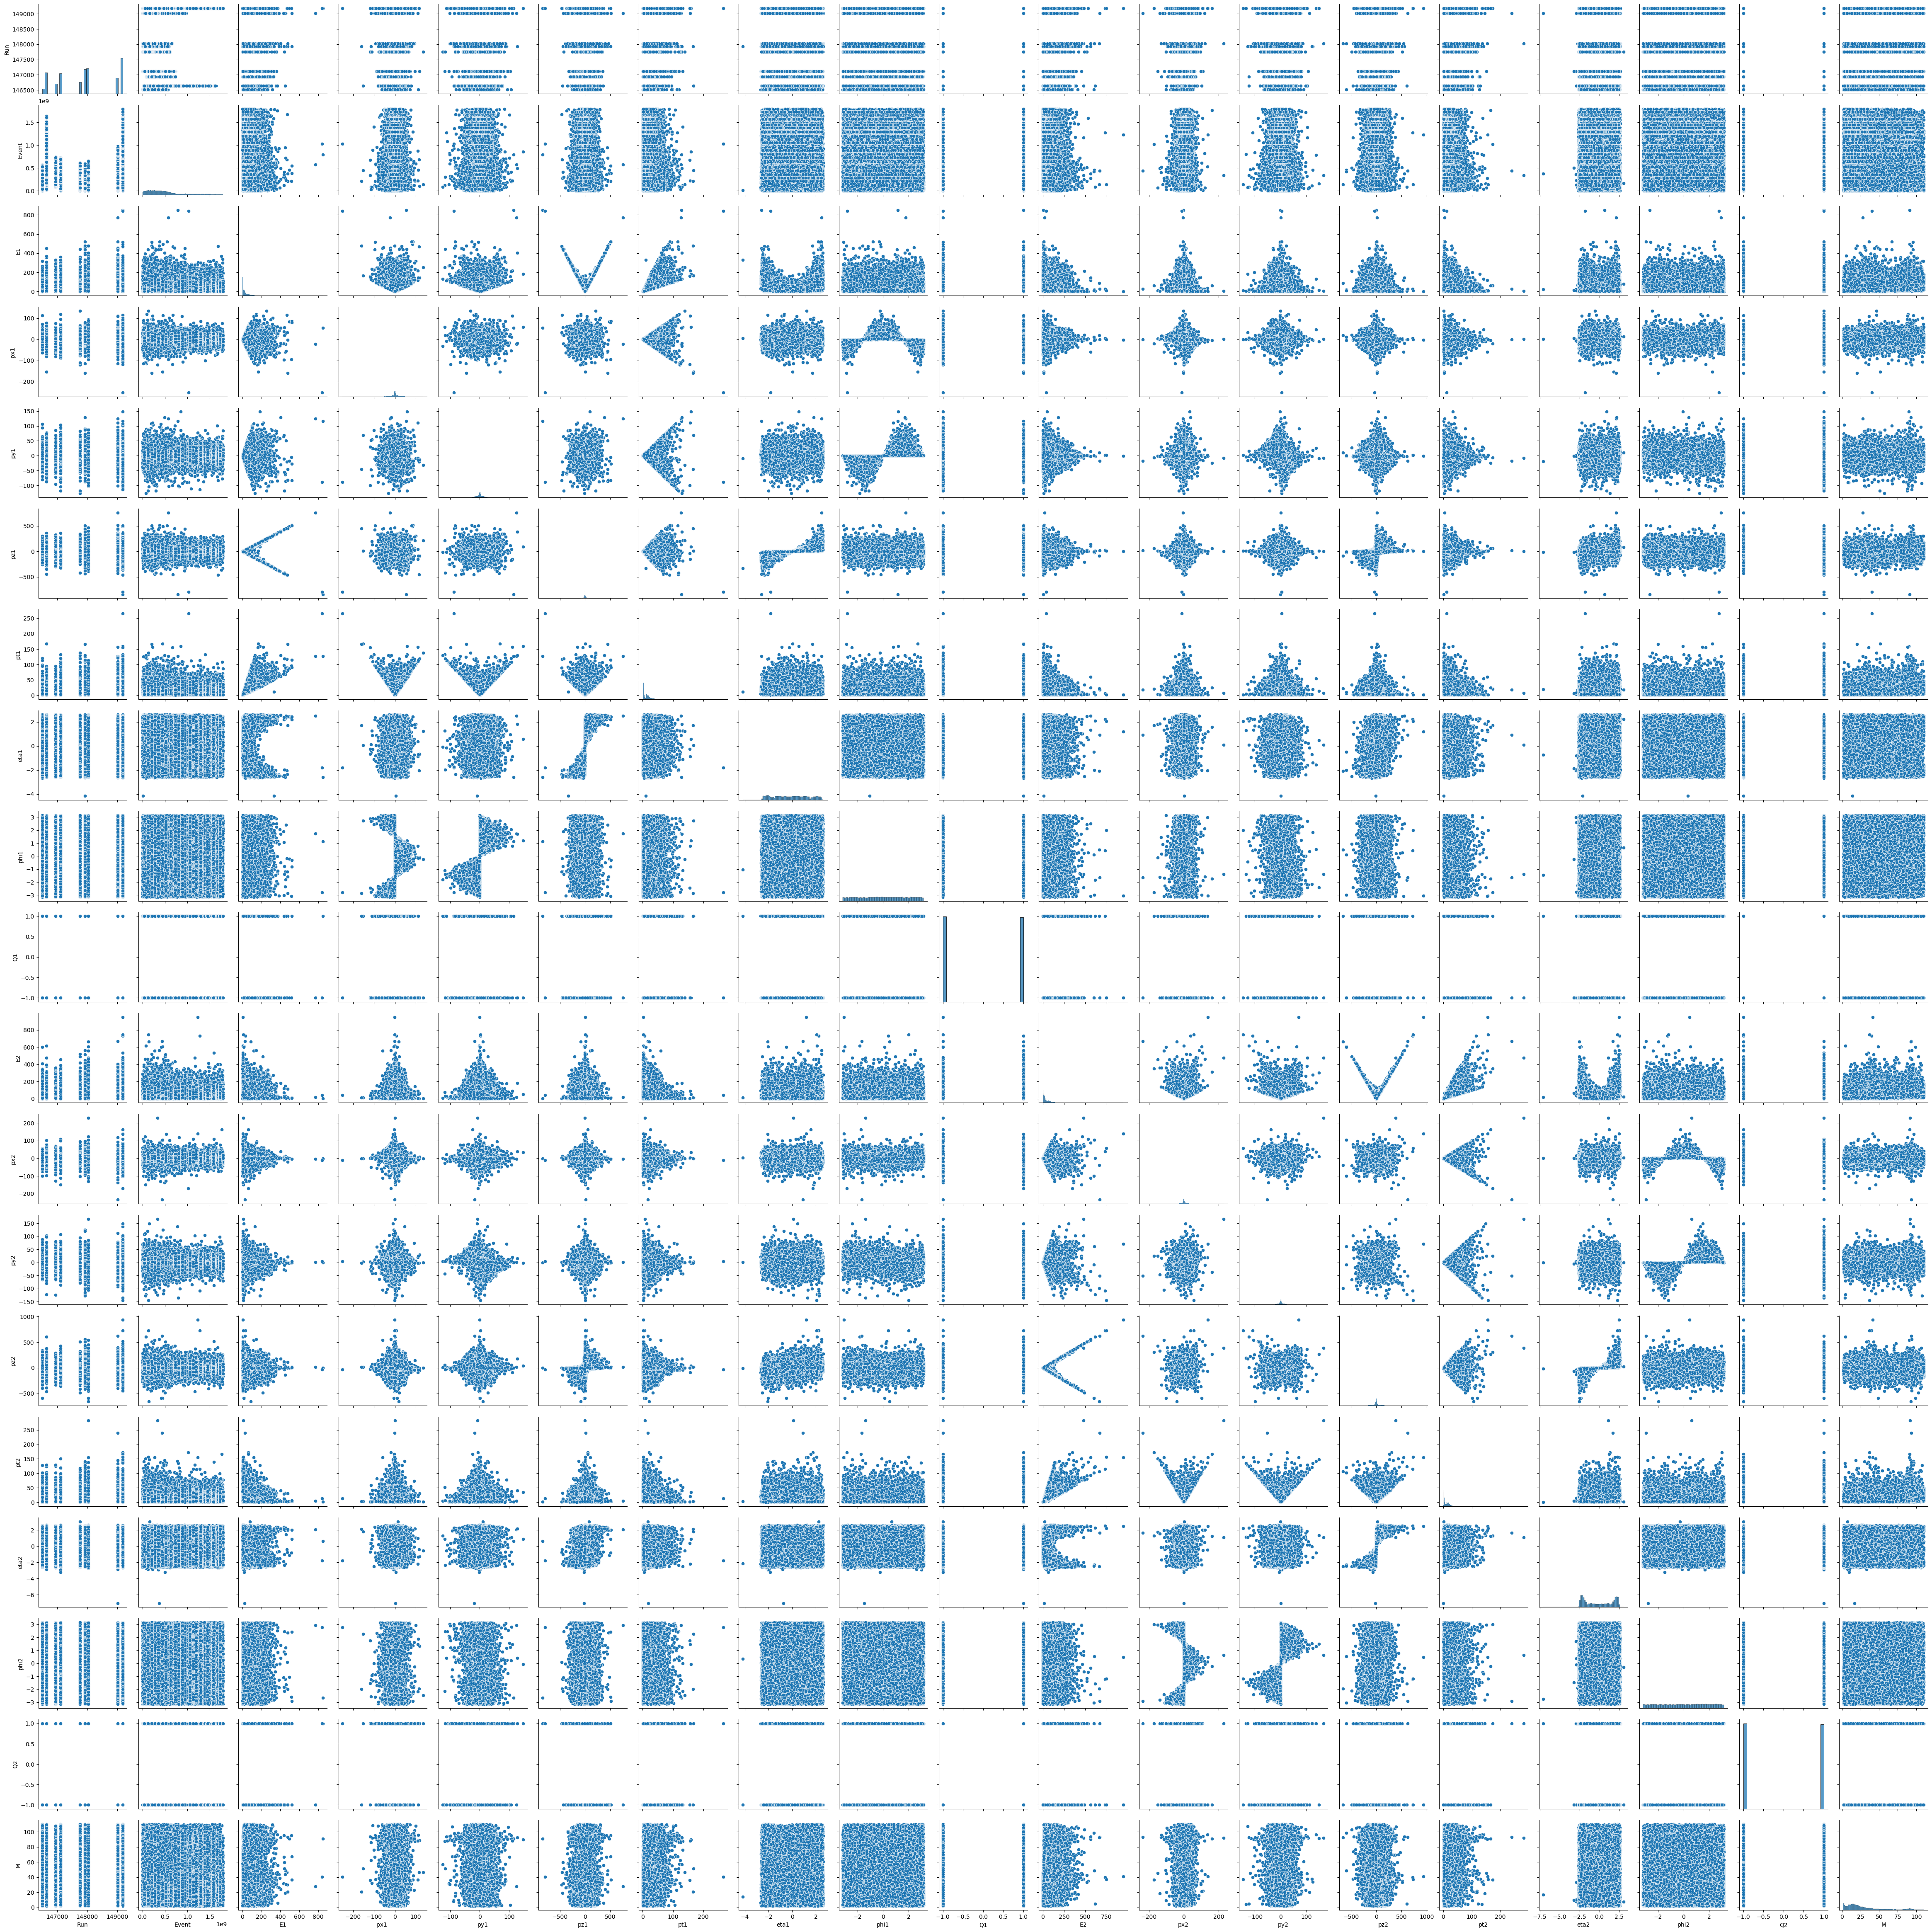

In [24]:
sns.pairplot(a)